<a href="https://colab.research.google.com/github/VladislavTumanov/bookish-computing-machine/blob/main/flight_delay_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
import io 
import seaborn as sns
import torch 
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import scipy
from sklearn.model_selection import  StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flight_delays_train (1).csv to flight_delays_train (1).csv


In [ ]:
train_df = pd.read_csv(io.BytesIO(uploaded['flight_delays_train (1).csv']))
train_df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flight_delays_test.csv to flight_delays_test.csv


In [ ]:
test_df = pd.read_csv(io.BytesIO(uploaded['flight_delays_test.csv']))
test_df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [ ]:
train_df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [ ]:
test_df.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1338.936600,723.13011
std,480.554102,563.22322
min,1.000000,31.00000
25%,928.000000,321.00000
50%,1329.000000,574.00000
75%,1733.000000,948.00000
max,2400.000000,4962.00000


In [ ]:
train_df.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min    object
dtype: object

In [ ]:
test_df.dtypes

Month            object
DayofMonth       object
DayOfWeek        object
DepTime           int64
UniqueCarrier    object
Origin           object
Dest             object
Distance          int64
dtype: object

In [ ]:
#function which is used when need NaN value replace on median
def delete_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [ ]:
train_df['Month'] = train_df['Month'].map(lambda x: x.strip('c-')).astype(int)
train_df['DayOfWeek'] = train_df['DayOfWeek'].map(lambda x: x.strip('c-')).astype(int)
train_df['DayofMonth'] = train_df['DayofMonth'].map(lambda x: x.strip('c-')).astype(int)

In [ ]:
test_df['Month'] = test_df['Month'].map(lambda x: x.strip('c-')).astype(int)
test_df['DayOfWeek'] = test_df['DayOfWeek'].map(lambda x: x.strip('c-')).astype(int)
test_df['DayofMonth'] = test_df['DayofMonth'].map(lambda x: x.strip('c-')).astype(int)

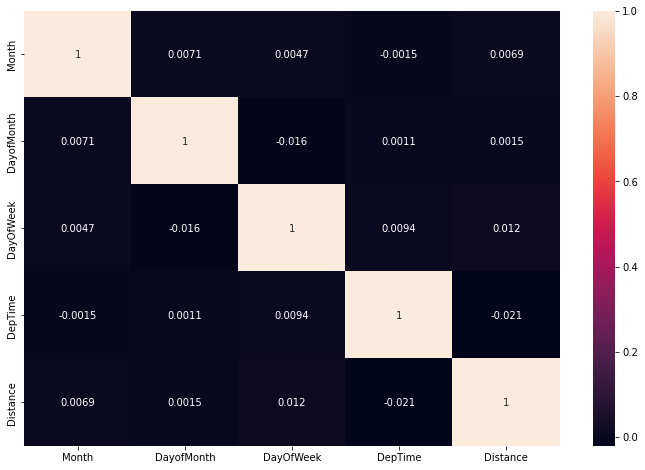

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot = True)

In [ ]:
train_df['dep_delayed_15min'] = train_df['dep_delayed_15min'].map({'Y':1, 'N':0})

In [ ]:
train_df = pd.get_dummies(train_df, columns = ['UniqueCarrier','Origin', 'Dest'])

In [ ]:
X, y = train_df.drop('dep_delayed_15min', axis = 1), train_df.dep_delayed_15min
X_train, X_valid, y_train, y_valid   = train_test_split(X, y, test_size=0.3, random_state=17)
X.shape, y.shape

((100000, 605), (100000,))

In [ ]:
X_train.dtypes

Month         int64
DayofMonth    int64
DayOfWeek     int64
DepTime       int64
Distance      int64
              ...  
Dest_WRG      uint8
Dest_WYS      uint8
Dest_XNA      uint8
Dest_YAK      uint8
Dest_YUM      uint8
Length: 605, dtype: object

In [ ]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_valid_scaled = scaled.fit(X_valid)

In [ ]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile()
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_valid_selected = select.transform(X_valid)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [294 307 572 596] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
X_train_log = np.log(X_train + 1)
X_valid_log = np.log(X_valid + 1)

# XGBClassifier


In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

xgb = XGBClassifier(percentile = 60)
xgb.fit(X_train, y_train)

XGBClassifier(percentile=60)

In [ ]:
xgb1 = XGBClassifier(percentile = 60)
xgb1.fit(X_train_selected, y_train)

XGBClassifier(percentile=60)

In [ ]:
xgb2 = XGBClassifier(percentile = 60)
xgb2.fit(X_train_log, y_train)

XGBClassifier(percentile=60)

In [ ]:
predictionproba = xgb.predict_proba(X_valid)[:, -1]
print('Roc score without scaled', roc_auc_score(y_valid, predictionproba))

Roc score without scaled 0.7200068730254786


In [ ]:
predictionproba1 = xgb1.predict_proba(X_valid_selected)[:, -1]
print('Roc score with selected percetile', roc_auc_score(y_valid, predictionproba1))

Roc score with selected percetile 0.7178575093062397


In [ ]:
predictionproba2 = xgb2.predict_proba(X_valid_log)[:, -1]
print('Roc score with selected percetile', roc_auc_score(y_valid, predictionproba2))

Roc score with selected percetile 0.7200068730254786


In [ ]:
xgb3 = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10, random_state = 17)
xgb3.fit(X_train, y_train)

[16:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear', random_state=17)

In [ ]:
predictionproba3 = xgb3.predict_proba(X_valid)[:, -1]
print('Roc score', roc_auc_score(y_valid, predictionproba3))

Roc score 0.70889563174801


# Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=17, class_weight="balanced")
parameters = {"C": (0.001, 0.01, 0.1, 1, 10), 'max_iter':[10,20,40,100]}
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)

In [ ]:
grid = GridSearchCV(lr, parameters, scoring ='roc_auc', cv=skf, n_jobs = -1)
grid.fit(X, y)
grid.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced', random_state=17)

In [ ]:
grid.best_score_

0.6925010462173617

In [ ]:
prediction = lr.predict(X_valid_log)

In [ ]:
print('Roc score', roc_auc_score(y_valid, prediction))

Roc score 0.6432260349479744


In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 0.01, random_state=17))
pipe.fit(X_train_selected, y_train)
pipe.score(X_valid_selected, y_valid)

0.8113666666666667

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 0.01, random_state=17))
pipe.fit(X_train, y_train)
pipe.score(X_valid, y_valid)

0.8108333333333333